# H-polytope Outer Approximations to AH-polytopes

In [2]:
import numpy as np
import pypolycontain as pp
import pydrake.solvers.mathematicalprogram as MP
import pydrake.solvers.gurobi as Gurobi_drake
# use Gurobi solver
global gurobi_solver, license
gurobi_solver=Gurobi_drake.GurobiSolver()
license = gurobi_solver.AcquireLicense()
import pydrake.solvers.scs as SCS
scs_solver=SCS.ScsSolver()

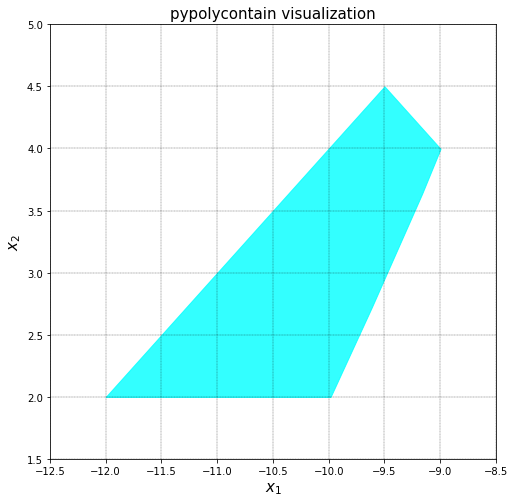

In [3]:
G=np.random.random((2,11))-0.5
X1=pp.zonotope( x=np.random.random((2,1))*3,G=G ,color='red')
H=np.array([[1,1],[-1,1],[0,-1]])
h=np.array([1,0,0]).reshape(3,1)*5
X2=pp.H_polytope(H,h, color='orange')
X=pp.translate(P=pp.intersection(X1,X2),t=np.array([-12,2]).reshape(2,1))
X.color='cyan'
pp.visualize([X])

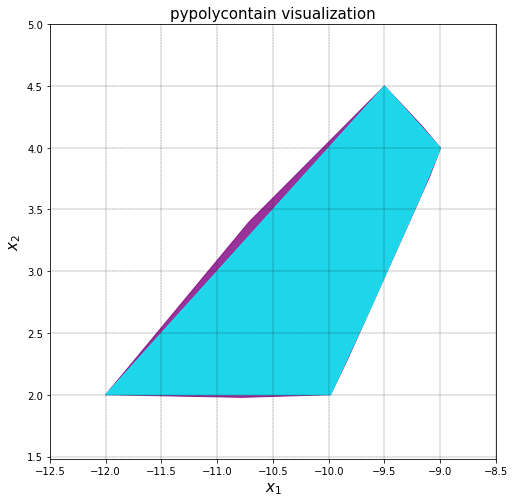

In [13]:
Y=pp.ray_shooting_hyperplanes(X,N=100)
Y.color='purple'
pp.visualize([Y,X])

## prog=MP.MathematicalProgram()
# T_y=prog.NewContinuousVariables(2*q,1,"hy")
# T=prog.NewSymmetricContinuousVariables(2,'T')
T=prog.NewContinuousVariables(2,2,'T')
t=prog.NewContinuousVariables(2,1,'t')
# prog.AddPositiveSemidefiniteConstraint(T)
prog.AddMaximizeLogDeterminantSymmetricMatrixCost(T)
new_X=pp.affine_map(t=t,T=T,P=X)
# new_X=pp.AH_polytope(t=t+X.t,T=np.dot(T,X.T),P=X.P)
pp.subset(prog,new_X,Y_n)
result=scs_solver.Solve(prog,None,None)
if result.is_success():
    T_n=result.GetSolution(T)
    t_n=np.atleast_2d(result.GetSolution(t)).T
    Tinv=np.linalg.inv(T_n)
    X_new=pp.affine_map(T=T_n,t=t_n,P=X)
    Y_new=pp.affine_map(T=Tinv,t=-np.dot(Tinv,t_n),P=Y_n)
#     Y_new_2=pp.affine_map(T=Tinv,P=pp.translate(-t_n,Y_n))
    X_new.color='yellow'
#     X_new_new=pp.affine_map(T=Tinv,t=-np.dot(Tinv,t_n),P=X_new)
    pp.visualize([Y_n,Y_new,X],alpha=0.9,a=0.2)
    pp.visualize([Y_n,X],alpha=0.9,a=0.2)
    pp.visualize([Y_n,X_new],alpha=0.7,a=0.2)
#     pp.visualize([X_new_new,X],alpha=0.2)
#     pp.visualize([Y_new_2,Y_new],alpha=0.3,title='Y transformed')
    print(np.linalg.det(T_n))
    print(T_n)
    print(t_n)
else:
    print("not sucessfull")